In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [188]:
#Reading the input dataset file using pandas
df = pd.read_csv(r'C:\Users\nikhi\Downloads\digit-recognizer\train.csv')
df.head()
#we can subsample data by 10% 
df2 = df.sample(frac=0.1, random_state=42) 


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
df = df.values
print(df)


[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


In [190]:
#seperating the labels from data
X = df[:, 1:]
y = df[:, 0]

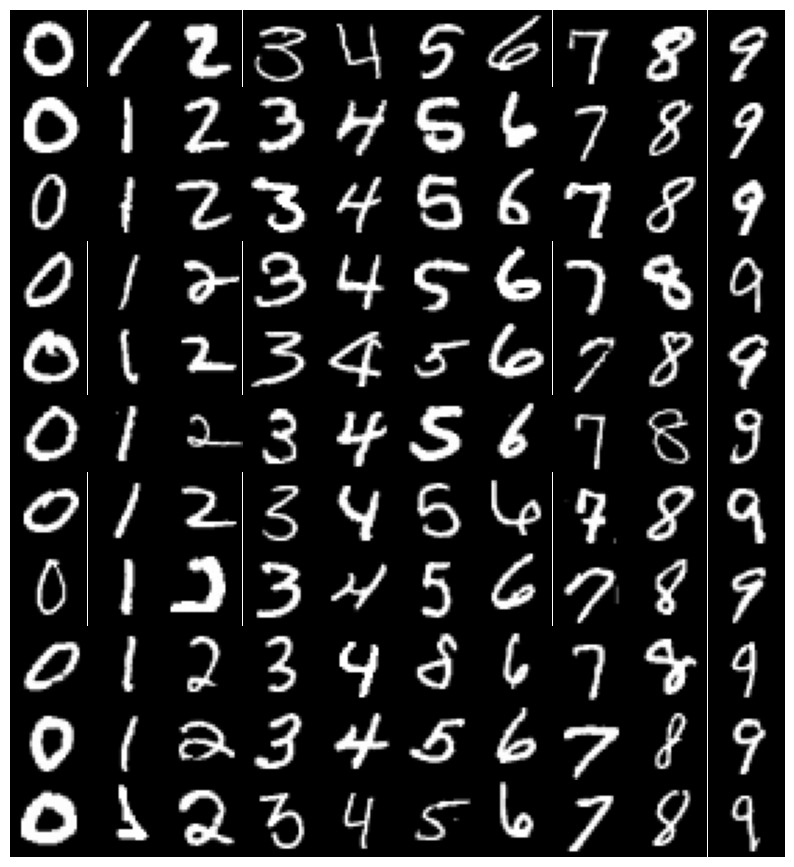

In [191]:
# To plot the first 11 images from each digit category
fig, axes = plt.subplots(nrows=11, ncols=10, figsize=(10, 11))
for i in range(10):
    images = X[y == i][:11]
    for j in range(11):
        axes[j, i].imshow(images[j].reshape(28, 28), cmap='gray')
        axes[j, i].axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()


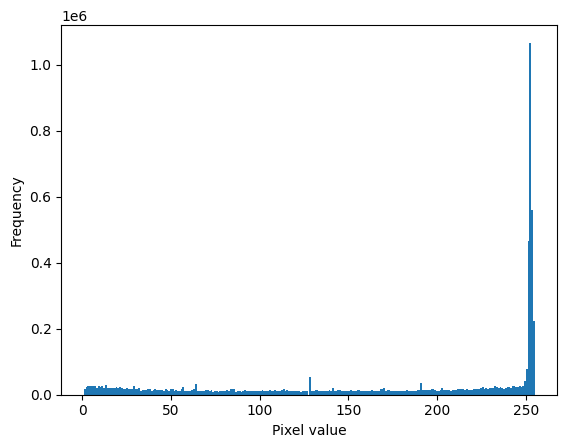

In [192]:
# Plot for the histogram of the pixel values
fig, ax = plt.subplots()
ax.hist(X.flatten(), bins=256, range=(1, 255))
ax.set_xlabel('Pixel value')
ax.set_ylabel('Frequency')
plt.show()

In [193]:
print(X.shape)
print(y.shape)
print(y[65])

(42000, 784)
(42000,)
3


In [212]:
#normalizing the pixel values by dividing each pixel value by 255
X=X/255
print(X.shape)
print(X[3455, 345])

(42000, 784)
0.0001845444059976932


In [195]:
# Taking a single digit to measure accuracy
digit = 7

y_binary = np.where(y == digit, 1, 0)

In [196]:
n_samples = X.shape[0]

indices = np.random.permutation(n_samples)

n_train = int(0.8 * n_samples)

# Split the data into training and test sets
X_train = X[indices[:n_train]]
y_train = y[indices[:n_train]]

X_test = X[indices[n_train:]]
y_test = y[indices[n_train:]]

y_train_digit = y_binary[indices[:n_train]]
y_test_digit = y_binary[indices[n_train:]]

In [197]:
#function to calculate the euclidean distances
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))



In [198]:
#function for the KNN algorithm
def knn(X_train, y_train, X_test, k):

    n_test = X_test.shape[0]
    
    # Initializing the predictions array
    predictions = np.zeros(n_test)
    
    for i in range(n_test):
        # Determine the distances between the present test sample and all of the training samples.
        distances = np.array([euclidean_distance(X_test[i], X_train[j]) for j in range(X_train.shape[0])])
        
        # Determine the indices of the k closest neighbors.
        k_nearest = np.argsort(distances)[:k]
        
        classes = y_train[k_nearest].astype(int)
        count = np.bincount(classes)
        
        prediction = np.argmax(count)
        
        predictions[i] = prediction
    
    return predictions

In [210]:
#Accuracy function 
def accuracy(predictions, y_test):
    correct = 0
    for i in range(len(X_test)):
        if predictions[i] == y_test[i]:
            correct += 1
    accuracy = correct / len(y_test) * 100
    return accuracy


In [211]:
k = 6

start_time = time.time()

# Predicting the labels of the test set using the KNN algorithm
predictions = knn(X_train, y_train, X_test, k)
predictions = predictions.astype(int)
# Calculating the accuracy of the classifier
end_time = time.time()

acc = accuracy(predictions, y_test)

print("Accuracy: {:.2f}%".format(acc))
print("Wall-clock time:", end_time - start_time, "seconds")

Accuracy: 96.23%
Wall-clock time: 3707.5971281528473 seconds


In [140]:
# Initialize the confusion matrix
conf_matrix = np.zeros((10, 10), dtype=int)

# Predict the labels of the test set using the KNN algorithm
predictions = knn(X_train, y_train, X_test, k)
predictions = predictions.astype(int)


n_test = X_test.shape[0]


for i in range(n_test):
    true_label = int(y_test[i])
    pred_label = int(predictions[i])
    conf_matrix[true_label, pred_label] += 1

# Print the confusion matrix
print("Confusion matrix:")
print(conf_matrix)


Confusion matrix:
[[796   1   1   0   0   2   4   0   0   1]
 [  0 937   2   0   1   0   1   3   0   1]
 [ 10  13 800   0   0   2   1  14   1   2]
 [  3   3   6 816   0   7   0   5   5   4]
 [  0  10   0   0 816   0   3   1   1  20]
 [  3   1   0  10   0 710   6   1   2   6]
 [  2   0   0   0   1   1 841   0   0   0]
 [  0  12   3   0   2   0   0 835   0   4]
 [  1  11   3  13   3   9   2   3 743  12]
 [  3   1   1   6  13   2   0  12   1 828]]


In [186]:

# Varying K and measuring accuracy for predicting digit 7
for K in range(1, 21):

    y_pred_binary = knn(X_train, y_train_digit, X_test, K)

    # Computing accuracy
    accuracy = np.mean(y_pred_binary == y_test_digit)
    print(f"K={K}, accuracy={accuracy:.3f}")


K=1, accuracy=0.993
K=2, accuracy=0.993
K=3, accuracy=0.993
K=4, accuracy=0.993
K=5, accuracy=0.992
K=6, accuracy=0.992
K=7, accuracy=0.992
K=8, accuracy=0.992
K=9, accuracy=0.991
K=10, accuracy=0.992
K=11, accuracy=0.991
K=12, accuracy=0.991
K=13, accuracy=0.991
K=14, accuracy=0.991
K=15, accuracy=0.991
K=16, accuracy=0.991
K=17, accuracy=0.990
K=18, accuracy=0.990
K=19, accuracy=0.990
K=20, accuracy=0.990


In [207]:
#running algorithm on subsampled data and plotting accuracy for digit as function of k

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
df = pd.read_csv(r'C:\Users\nikhi\Downloads\digit-recognizer\train.csv')
df.head()
df = df.sample(frac=0.1, random_state=42)

df = df.values
print(df)


X1 = df[:, 1:]
y1 = df[:, 0]


X1=X1/255
print(X1.shape)
print(X1[3455, 345])


# Choose a single digit to measure accuracy
digit = 9


y1_binary = np.where(y1 == digit, 1, 0)



# Number of samples in the dataset
n_samples = X1.shape[0]


indices = np.random.permutation(n_samples)


n_train = int(0.8 * n_samples)


X1_train = X1[indices[:n_train]]
y1_train = y1[indices[:n_train]]

X1_test = X1[indices[n_train:]]
y1_test = y1[indices[n_train:]]

y1_train_digit = y1_binary[indices[:n_train]]
y1_test_digit = y1_binary[indices[n_train:]]





def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))



def knn(X1_train, y1_train, X1_test, k):

    n_test = X1_test.shape[0]
    

    predictions = np.zeros(n_test)
    
    for i in range(n_test):
        # Determine the distances between the present test sample and all of the training samples.
        distances = np.array([euclidean_distance(X1_test[i], X1_train[j]) for j in range(X1_train.shape[0])])
        
        # Determine the indices of the k closest neighbors.
        k_nearest = np.argsort(distances)[:k]
        
        classes = y1_train[k_nearest].astype(int)
        count = np.bincount(classes)
        
        prediction = np.argmax(count)
        
        predictions[i] = prediction
    
    return predictions



def compute_accuracy(predictions, y1_test):
    # Compute the accuracy of the classifier
    correct = np.sum(predictions == y1_test)
    return correct / len(y1_test)


K = np.arange(1, 21)
accuracy = np.zeros(len(K))
for i, k in enumerate(K):
    predictions = knn(X1_train, y1_train_digit, X1_test, k)
    accuracy[i] = compute_accuracy(predictions, y1_test_digit)
 







[[8 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]
(4200, 784)
0.9921568627450981


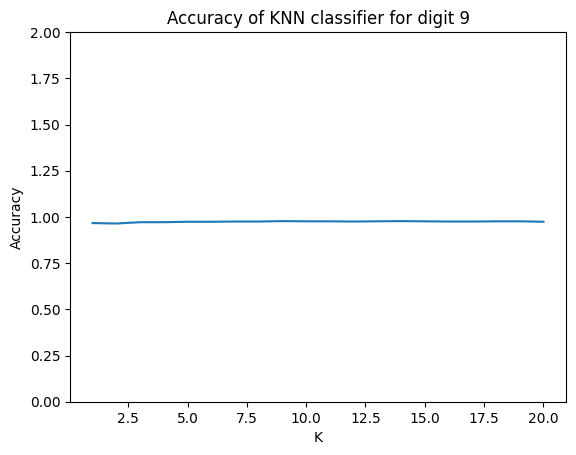

In [208]:
# plot the accuracy as a function of K
plt.ylim(0, 2)
plt.plot(K, accuracy)
plt.title("Accuracy of KNN classifier for digit {}".format(digit))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()
